In [15]:
%reset
from __future__ import print_function
%load_ext autoreload
%autoreload 2
from pixell import enmap
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from pixell import reproject




Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
nside_out = 4096
lmax = 3*nside_out - 1

filename = '/global/project/projectdirs/des/shivamp/ACTxDESY3_data/act_ymap_releases/v1.0.0/tilec_single_tile_deep56_comptony_deprojects_cmb_map_v1.0.0_rc_joint.fits'  

act_ymap_car = enmap.read_map(filename)

act_ymap_hp = reproject.healpix_from_enmap(act_ymap_car, lmax, nside_out)



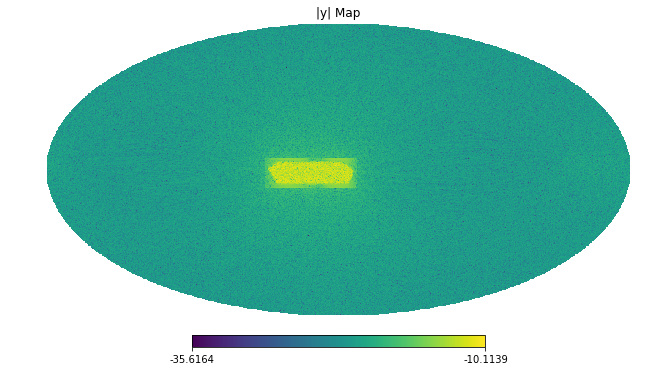

In [4]:
hp.mollview(np.log(np.abs(act_ymap_hp)), title='|y| Map')




In [18]:
from astropy.io import fits
mapf = fits.open('/global/project/projectdirs/des/shivamp/actxdes/data_set/ACTxDESY3/act_ymap_releases/v1.0.0/tilec_mask.fits')
mapf[0].header



SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 6825                                                  
NAXIS2  =                 1820                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =               3598.0 / Pixel coordinate of reference point            
CRPIX2  =               1108.0 / Pixel coordinate of reference point            
CDELT1  =    -0.00833333333333 / [deg] Coordinate increment at reference point  
CDELT2  =     0.00833333333333 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---CAR'        

In [31]:


filename = '/global/project/projectdirs/des/shivamp/actxdes/data_set/ACTxDESY3/act_ymap_releases/v1.0.0/tilec_mask.fits'

act_mask_car = enmap.read_map(filename)






In [33]:
nside_out = 4096
lmax = 3*nside_out - 1
act_mask_hp = reproject.healpix_from_enmap(act_mask_car.astype(np.float64),lmax,nside_out)




Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


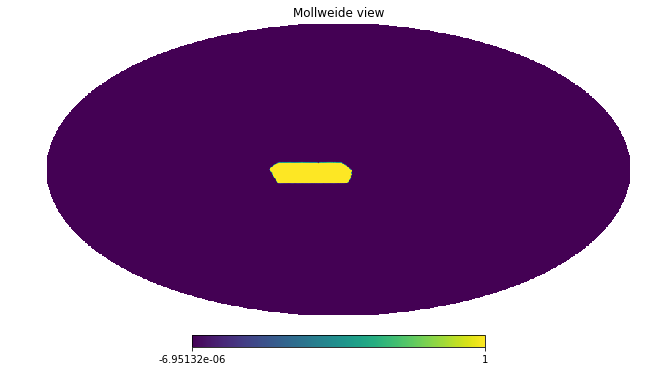

In [22]:
hp.mollview((act_mask_hp))






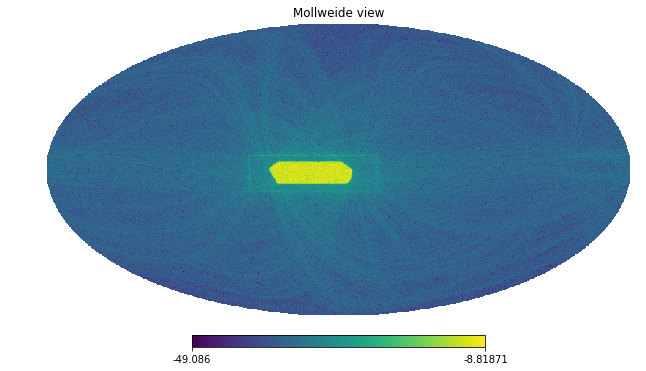

In [20]:
hp.mollview(np.log(np.abs(act_mask_hp*act_ymap_hp)))


In [26]:
act_mask_hp_new = np.copy(act_mask_hp)

ind_neg = np.where(act_mask_hp_new < 0)[0]

act_mask_hp_new[ind_neg] = 10**-50





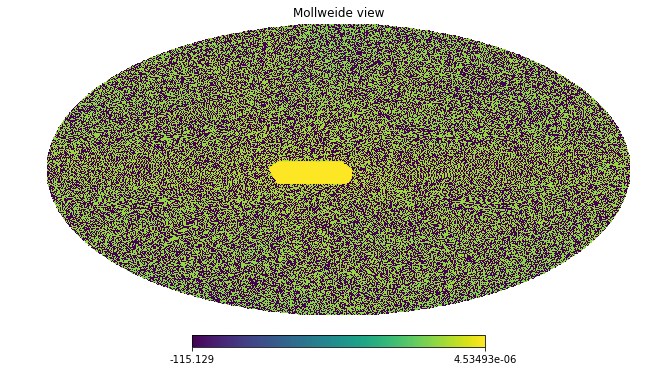

In [27]:
hp.mollview(np.log(np.abs(act_mask_hp_new)))





In [60]:
act_mask_hp_new2 = np.copy(act_mask_hp)

ind_low = np.where(act_mask_hp_new < 0.00001)[0]

act_mask_hp_new2[ind_low] = 10**-18




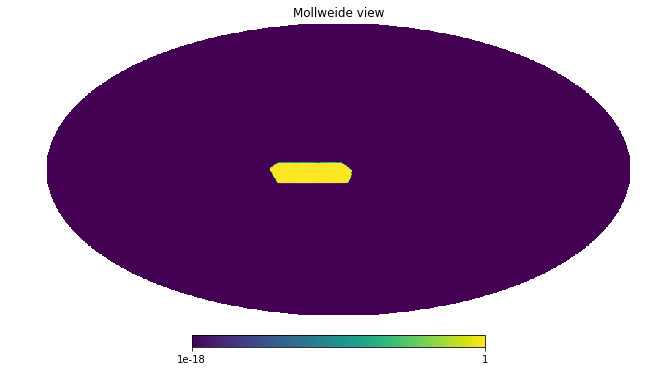

In [61]:
hp.mollview((act_mask_hp_new2))



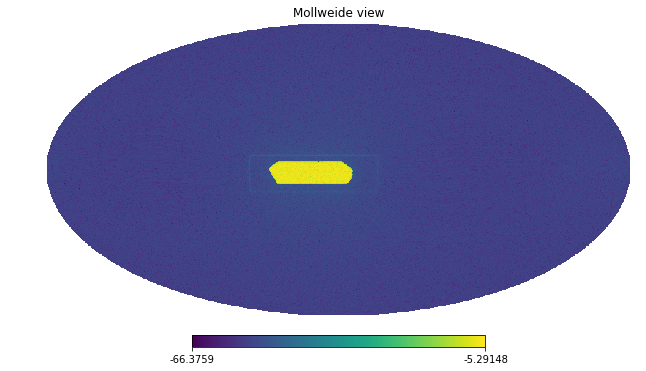

In [62]:
hp.mollview(np.log(np.abs(act_mask_hp_new2*act_ymap_hp)))



In [3]:

act_ymap_hp = hp.read_map('/global/project/projectdirs/des/shivamp/ACTxDESY3_data/act_ymap_releases/v1.0.0/tilec_single_tile_deep56_comptony_map_v1.0.0_rc_joint_healpix.fits')   

beam_hp = np.loadtxt('/global/project/projectdirs/des/shivamp/ACTxDESY3_data/act_ymap_releases/v1.0.0/tilec_single_tile_deep56_comptony_map_v1.0.0_rc_joint_beam.txt')




NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [4]:
act_ymap_alm_cl = hp.anafast(act_ymap_hp, alm=True)




In [6]:
# act_ymap_alm = hp.map2alm(act_ymap_hp)

act_ymap_cl, act_ymap_alm = act_ymap_alm_cl[0], act_ymap_alm_cl[1]



In [7]:

l_ycl = np.arange(len(act_ymap_cl))



In [8]:
beam_hp.shape


(30596, 2)

In [9]:
import scipy.interpolate as interpolate
beam_interp = interpolate.interp1d(beam_hp[:,0],beam_hp[:,1])
beam_lycl = beam_interp(l_ycl)



In [10]:

alm_new = hp.almxfl(act_ymap_alm, 1./beam_lycl)



In [11]:
act_ymap_hp_unsmooth = hp.alm2map(alm_new, nside=4096)



Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


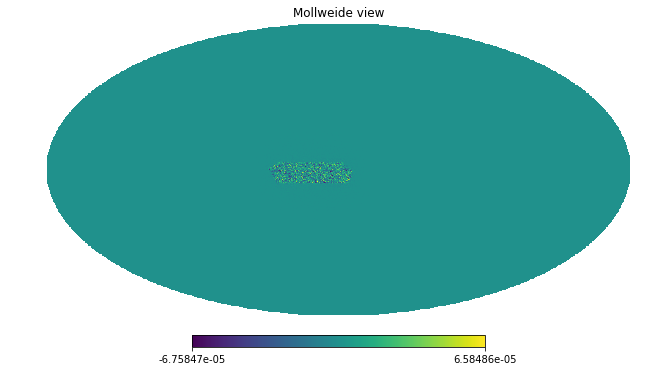

In [12]:
hp.mollview(act_ymap_hp_smooth)



In [14]:

hp.write_map('/global/project/projectdirs/des/shivamp/ACTxDESY3_data/act_ymap_releases/v1.0.0/tilec_single_tile_deep56_comptony_map_v1.0.0_rc_joint_beamdeconv_healpix.fits',act_ymap_hp_unsmooth)



In [16]:
beam_hp1 = np.loadtxt('/global/project/projectdirs/des/shivamp/ACTxDESY3_data/act_ymap_releases/v1.0.0/tilec_single_tile_deep56_comptony_map_v1.0.0_rc_joint_beam.txt')

beam_hp2 = np.loadtxt('/global/project/projectdirs/des/shivamp/ACTxDESY3_data/act_ymap_releases/v1.0.0/tilec_single_tile_deep56_comptony_deprojects_cib_map_v1.0.0_rc_joint_beam.txt')


beam_hp3 = np.loadtxt('/global/project/projectdirs/des/shivamp/ACTxDESY3_data/act_ymap_releases/v1.0.0/tilec_single_tile_deep56_comptony_deprojects_cmb_map_v1.0.0_rc_joint_beam.txt')








In [40]:
ell1 = beam_hp1[:,0]
theta_arcmin1 = 1.6
theta_rad1 = theta_arcmin1*(1./60.)*(np.pi/180.)
sig1 = theta_rad1/np.sqrt(8*np.log(2))
Bl1 = np.exp(-1.*ell1*(ell1+1)* (sig1**2)/2. )


ell2 = beam_hp2[:,0]
theta_arcmin2 = 2.4
theta_rad2 = theta_arcmin2*(1./60.)*(np.pi/180.)
sig2 = theta_rad2/np.sqrt(8*np.log(2))
Bl2 = np.exp(-1.*ell1*(ell1+1)* (sig2**2)/2. )



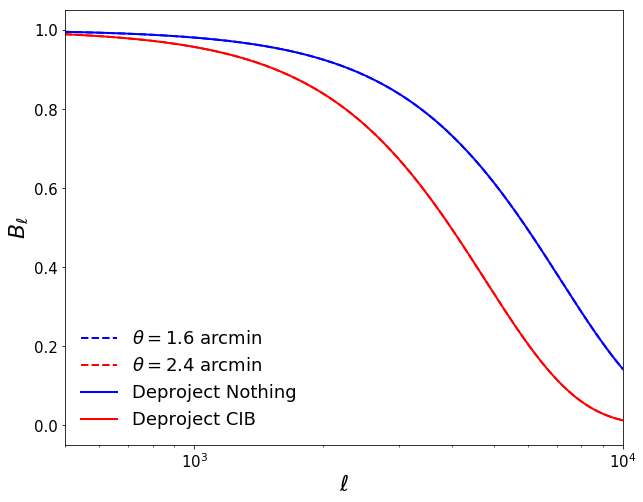

In [43]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches((10,8))
ax.plot(ell1, Bl1, label = r'$\theta=$' + str(theta_arcmin1) + ' arcmin', lw=2, ls='--', color='b')
ax.plot(ell2, Bl2, label = r'$\theta=$' + str(theta_arcmin2) + ' arcmin', lw=2, ls='--', color='r')
ax.plot(beam_hp1[:,0], beam_hp1[:,1], label = 'Deproject Nothing', lw=2, ls='-', color='b')
ax.plot(beam_hp2[:,0], beam_hp2[:,1], label = 'Deproject CIB', lw=2, ls='-', color='r')

ax.tick_params(axis='both', which = 'minor', labelsize=15)
ax.tick_params(axis='both', which = 'major', labelsize=15)
ax.set_xlim(500,1e4)
ax.set_xscale('log')
ax.set_xlabel(r'$\ell$', size = 22)
ax.set_ylabel(r'$B_{\ell}$', size = 22)
# ax.set_yscale('log')
ax.legend(fontsize = 18, frameon = False)



